In [14]:
import numpy as np

def sign(x,w,b):
    return np.dot(x,w)+b

def initialize_parameters(dim):
    w=np.zeros(dim)
    b=0.0
    return w,b

In [15]:
def perceptron_train(X_train,y_train,learning_rate):
    
    w,b=initialize_parameters(X_train.shape[1])
    
    is_wrong=False
    
    while not is_wrong:
        
        wrong_count=0
        
        for i in range(len(X_train)):
            X=X_train[i]
            y=y_train[i]
            
            if y*sign(X,w,b)<=0:
                w+=learning_rate*np.dot(y,X)
                b+=learning_rate*y
                wrong_count+=1
        if wrong_count==0:
            is_wrong=True
            print('There is no missclassification')
            
        params={
            'w':w,
            'b':b
        }
    
    return params

In [16]:
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()

df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['label']=iris.target
df.columns=['speal length','speal width','petal length','petal width','label']

data=np.array(df.iloc[:100,[0,1,-1]])
X,y=data[:,:-1],data[:,-1]
y=np.array([1 if i==1 else  -1 for i in y])

print(X.shape,y.shape)

(100, 2) (100,)


In [17]:
params= perceptron_train(X,y,0.01)
print(params)

There is no missclassification
{'w': array([ 0.79 , -1.007]), 'b': -1.2400000000000009}


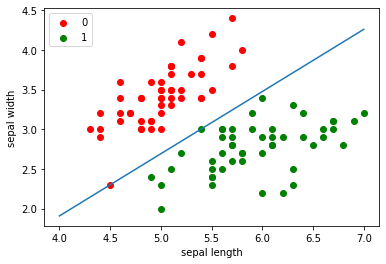

In [18]:
import matplotlib.pyplot as plt
x_points=np.linspace(4,7,10)
y_hat=-(params['w'][0]*x_points + params['b'])/params['w'][1]
plt.plot(x_points,y_hat)
plt.scatter(data[:50,0],data[:50,1],color='red',label='0')
plt.scatter(data[50:100,0],data[50:100,1],color='green',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.legend()
plt.show()